In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [2]:
load_data = pd.read_excel("/content/Load Data in kW (1).xlsx")
load_data.head()


,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [3]:
load_data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [4]:
load_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7f2fbd4bcb90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2fbd4d1f90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2fbd46c790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2fbd46c250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2fbd4cbf50>,
  <matplotlib.lines.Line2D at 0x7f2fbd4d1750>]}

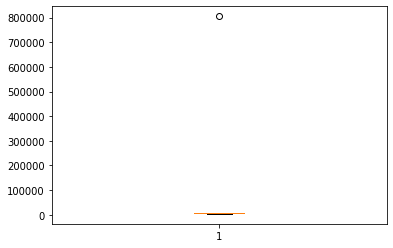

In [5]:
plt.boxplot(load_data.iloc[:,0])


In [6]:

from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))


(array([928]),)


In [7]:
load_data.iloc[928,0] = load_data.iloc[927,0]


{'boxes': [<matplotlib.lines.Line2D at 0x7f2fbcec9190>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2fbcecf190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2fbced71d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2fbcecfc50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2fbcec96d0>,
  <matplotlib.lines.Line2D at 0x7f2fbcec9c10>]}

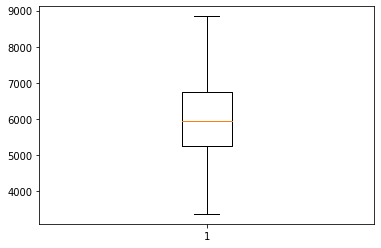

In [8]:
plt.boxplot(load_data.iloc[:,0])


In [9]:
x = []
y = []
for i in range(len(load_data.iloc[:,0])-24):
  x.append(load_data.iloc[i,0])
  y.append(load_data.iloc[i+24,0])


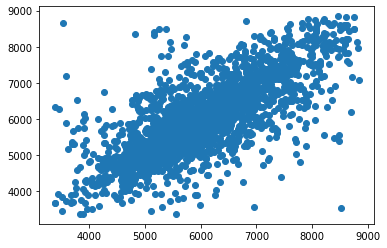

In [10]:
plt.scatter(x,y)


In [11]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

def gradm(d,m,c,v_m,v_c,momentum_coeff):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coeff*v_m)*d[i][0]-(c+momentum_coeff*v_c))*d[i][0]
  return -1*sum/len(d)

def gradc(d,m,c,v_m,v_c,momentum_coeff):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coeff*v_m)*d[i][0]-(c+momentum_coeff*v_c))
  return -1*sum/len(d)


In [12]:
learning_rate = 0.01
epochs = 20

m = 1
c = 1

v_m = 0
v_c = 0
momentum_coeff = 0.9

batch_size = 500


In [13]:
x = minmax_scale(x)
y = minmax_scale(y)


In [14]:
data = []

for i in range(len(x)):
  data.append((x[i],y[i]))

print(len(data))

data_train,data_test = train_test_split(data,test_size=0.1)

len(data_train)


2159


1943

In [15]:
error_list = []
number_of_batches = (len(data_train)//batch_size)
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = data_train[j*batch_size:]
    else:
      d = data_train[j*batch_size:(j+1)*batch_size]

    deltam = -1*learning_rate*gradm(d,m,c,v_m,v_c,momentum_coeff)
    deltac = -1*learning_rate*gradc(d,m,c,v_m,v_c,momentum_coeff)

    v_m = v_m*momentum_coeff + deltam
    v_c = v_c*momentum_coeff + deltac

    m = m + v_m
    c = c + v_c

    print("epoch {}, batch {}, error {}".format(i,j,error(d,m,c)))
    error_list.append(error(d,m,c))
  random.shuffle(data_train)


epoch 0, batch 0, error 0.4850363464965154
epoch 0, batch 1, error 0.4885653395743512
epoch 0, batch 2, error 0.4446524114742973
epoch 0, batch 3, error 0.4088515217500295
epoch 1, batch 0, error 0.36892212857074375
epoch 1, batch 1, error 0.3238896968031633
epoch 1, batch 2, error 0.27511279091615165
epoch 1, batch 3, error 0.23968661719153303
epoch 2, batch 0, error 0.19847032804404777
epoch 2, batch 1, error 0.16420240062117708
epoch 2, batch 2, error 0.12880924961590398
epoch 2, batch 3, error 0.09988773501268222
epoch 3, batch 0, error 0.07932479138880133
epoch 3, batch 1, error 0.05775563148102344
epoch 3, batch 2, error 0.0412708487648299
epoch 3, batch 3, error 0.028654968911293738
epoch 4, batch 0, error 0.02046136157498565
epoch 4, batch 1, error 0.015196264857570543
epoch 4, batch 2, error 0.011322911424990019
epoch 4, batch 3, error 0.009693385318972217
epoch 5, batch 0, error 0.009760933362439621
epoch 5, batch 1, error 0.009177755604089033
epoch 5, batch 2, error 0.011757

Text(0.5, 1.0, 'error graph')

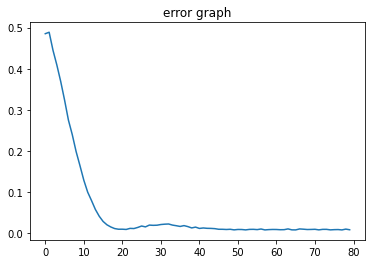

In [16]:
x1 = range(len(error_list))
y1 = error_list

plt.plot(x1,y1)
plt.title("error graph")


In [17]:
print("train error :",error(data_train,m,c))
print("test error :",error(data_test,m,c))


train error : 0.00882542847443571
test error : 0.009156650774908133


In [18]:
print(m,c)


0.6273403638914937 0.1859866439645934


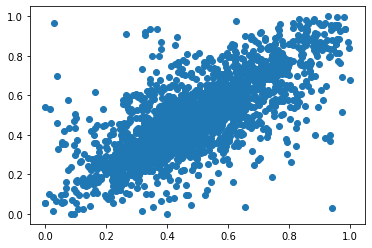

In [19]:
plt.scatter(x,y)


Text(0.5, 1.0, 'predicted line')

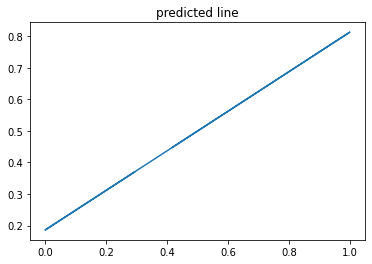

In [20]:
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)
plt.title("predicted line")


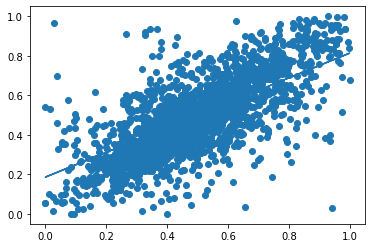

In [21]:
plt.scatter(x,y)
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)


In [22]:
input_load = float(input("enter yesterday load at this time : "))

max_value = 8841.669480
min_value = 3377.919600

input_load = (input_load - min_value)/(max_value-min_value)
output_load = input_load*m+c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)


enter yesterday load at this time : 15
predicted load for this hour is :  2284.4088980413135
